<a href="https://colab.research.google.com/github/aivydebnath/Earthquake-Prediction/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving earthquake_dataset.csv to earthquake_dataset.csv


In [2]:
import io
myfile = io.BytesIO(uploaded['earthquake_dataset.csv'])
type(myfile)
import pandas as pd
df = pd.read_csv(myfile,delimiter=r'\s+')
type(df)

pandas.core.frame.DataFrame

##Preprocessing
No preprocessing required because the data is already clean and structured.
We just have to change the column names to meaningful names.

In [3]:
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)",
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
1967-08-22 08:29:47.470,36.40050,-120.98650,36.357,3.0,Mx,9,298,16.0,0.63,NCSN,1001120.0
1967-08-26 10:35:05.610,36.53867,-121.16033,4.277,3.3,Mx,13,80,2.0,0.05,NCSN,1001154.0
1967-08-27 13:20:08.750,36.51083,-121.14500,1.386,3.6,Mx,11,174,6.0,0.11,NCSN,1001166.0
1968-01-12 22:19:10.350,36.64533,-121.24966,6.578,3.0,ML,14,155,2.0,0.07,NCSN,1001353.0
1968-02-09 13:42:37.050,37.15267,-121.54483,8.256,3.0,ML,25,157,7.0,0.08,NCSN,1001402.0
...,...,...,...,...,...,...,...,...,...,...,...
1989-10-18 04:28:14.730,36.97967,-121.76200,15.105,3.5,ML,43,69,6.0,0.07,NCSN,10090454.0
1989-10-18 04:50:26.810,37.17067,-122.01017,10.354,4.3,ML,46,59,2.0,0.06,NCSN,10090130.0
1989-10-18 05:09:33.580,37.03700,-121.79450,10.477,3.0,ML,14,212,15.0,0.05,NCSN,10090450.0
1989-10-18 05:18:34.060,37.02350,-121.84433,17.232,4.2,ML,34,212,10.0,0.08,NCSN,10090129.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9998 entries, 1967-08-22 08:29:47.470000 to 1989-10-18 05:38:01.920000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    9998 non-null   float64
 1   Longitude(deg)   9998 non-null   float64
 2   Depth(km)        9998 non-null   float64
 3   Magnitude(ergs)  9998 non-null   float64
 4   Magnitude_type   9998 non-null   object 
 5   No_of_Stations   9998 non-null   int64  
 6   Gap              9998 non-null   int64  
 7   Close            9998 non-null   float64
 8   RMS              9998 non-null   object 
 9   SRC              9998 non-null   object 
 10  EventID          9989 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 937.3+ KB


##Export Preprocessed dataset
Export the data into xlsx file

In [5]:
file_name = 'Earthquake_data_processed.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [6]:
import warnings
warnings.filterwarnings('ignore')

##Partition the data into Training and Testing data

In [7]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
Y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

##Linear regression

<h3>Loading the model and fitting it with training data</h3>

In [8]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics of linear regression

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.01, MSE: 0.18


<h3>Predict for new data</h3>



In [10]:
# Predict on new data
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [3.43248605 3.36390579]


<h3>Plot multiple linear regression model</h3>

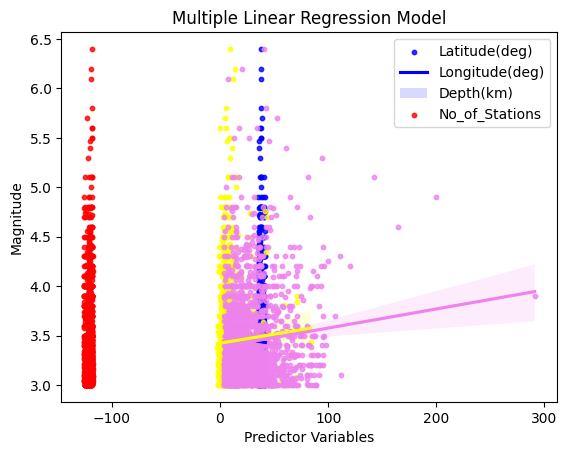

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude(deg)'], y=Y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=Y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=Y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=Y_test, color='violet', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

##Naive Bayes



>**Note: Naive bayes is used for strings and numbers(categorically) it can be used for classification so it can be either 1 or 0 nothing in between like 0.5 (regression). Even if we force naive bayes and tweak it a little bit for regression the result is disappointing; A team experimented with this and achieve not so good results.**





**`This code is just for predicting categorical data magnitude type with Naive Bayes`**

In [12]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import io
myfile = io.BytesIO(uploaded['earthquake_dataset.csv'])
type(myfile)

import pandas as pd
df = pd.read_csv(myfile,delimiter=r'\s+')
type(df)

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude", "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

display(df)

,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude,Magnitude_Category,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,1967/08/22,08:29:47.47,36.40050,-120.98650,36.357,3.0,Mx,9,298,16.0,0.63,NCSN,1001120.0
1,1967/08/26,10:35:05.61,36.53867,-121.16033,4.277,3.3,Mx,13,80,2.0,0.05,NCSN,1001154.0
2,1967/08/27,13:20:08.75,36.51083,-121.14500,1.386,3.6,Mx,11,174,6.0,0.11,NCSN,1001166.0
3,1968/01/12,22:19:10.35,36.64533,-121.24966,6.578,3.0,ML,14,155,2.0,0.07,NCSN,1001353.0
4,1968/02/09,13:42:37.05,37.15267,-121.54483,8.256,3.0,ML,25,157,7.0,0.08,NCSN,1001402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1989/10/18,04:28:14.73,36.97967,-121.76200,15.105,3.5,ML,43,69,6.0,0.07,NCSN,10090454.0
9994,1989/10/18,04:50:26.81,37.17067,-122.01017,10.354,4.3,ML,46,59,2.0,0.06,NCSN,10090130.0
9995,1989/10/18,05:09:33.58,37.03700,-121.79450,10.477,3.0,ML,14,212,15.0,0.05,NCSN,10090450.0
9996,1989/10/18,05:18:34.06,37.02350,-121.84433,17.232,4.2,ML,34,212,10.0,0.08,NCSN,10090129.0


In [15]:
# Convert magnitude column to categorical data
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=[0, 5, 6, 7, np.inf], labels=['Minor', 'Moderate', 'Strong', 'Major'])

# Encode Magnitude Category
le = LabelEncoder()
df['Magnitude_Category_Encoded'] = le.fit_transform(df['Magnitude_Category'])

# Normalize latitude and longitude values
scaler = MinMaxScaler()
df[['Latitude(deg)', 'Longitude(deg)']] = scaler.fit_transform(df[['Latitude(deg)', 'Longitude(deg)']])

# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
# Use the trained model to make predictions on the testing data
y_pred = gnb.predict(X_test)


In [17]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'])
print('Classification Report:\n', cr)

Accuracy: 0.98
Confusion Matrix:
 [[2939   44    0]
 [  14    1    0]
 [   2    0    0]]
Classification Report:
               precision    recall  f1-score   support

       Minor       0.00      0.00      0.00         0
    Moderate       0.99      0.99      0.99      2983
      Strong       0.02      0.07      0.03        15
       Major       0.00      0.00      0.00         2

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.25      0.26      0.26      3000
weighted avg       0.99      0.98      0.98      3000



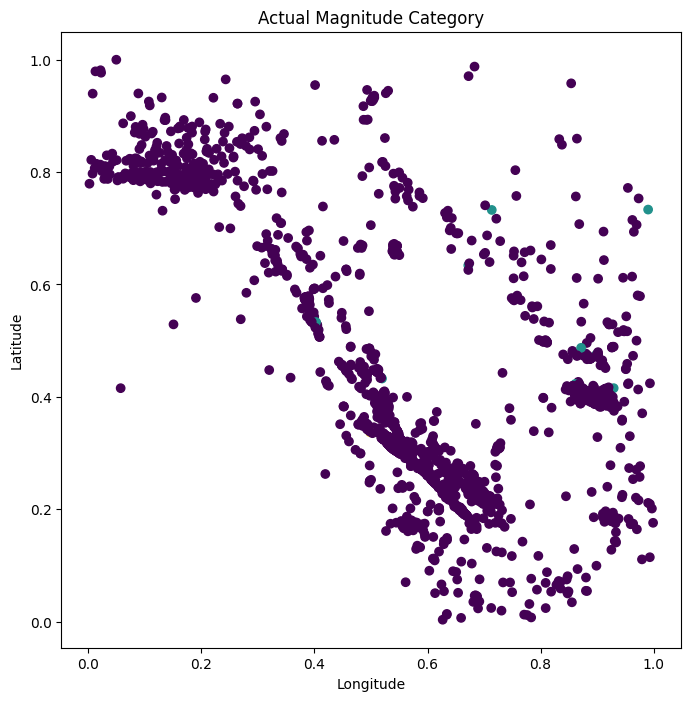

In [18]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_test, cmap='viridis')
plt.title('Actual Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")

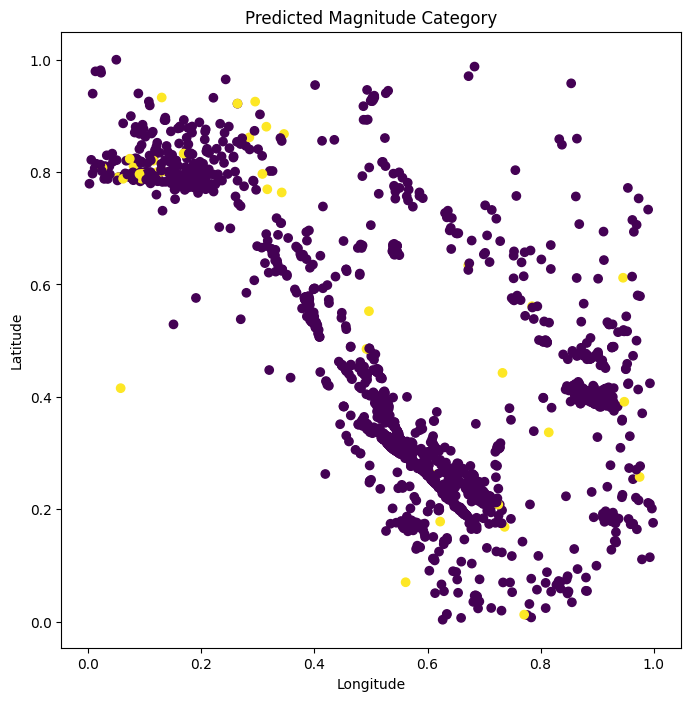

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_pred, cmap='viridis')
plt.title('Predicted Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")

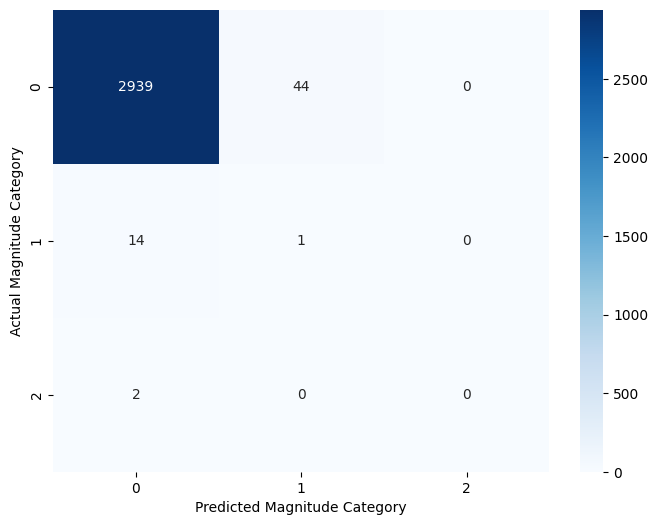

In [23]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Magnitude Category')
plt.ylabel('Actual Magnitude Category')
plt.show()
print(" ")

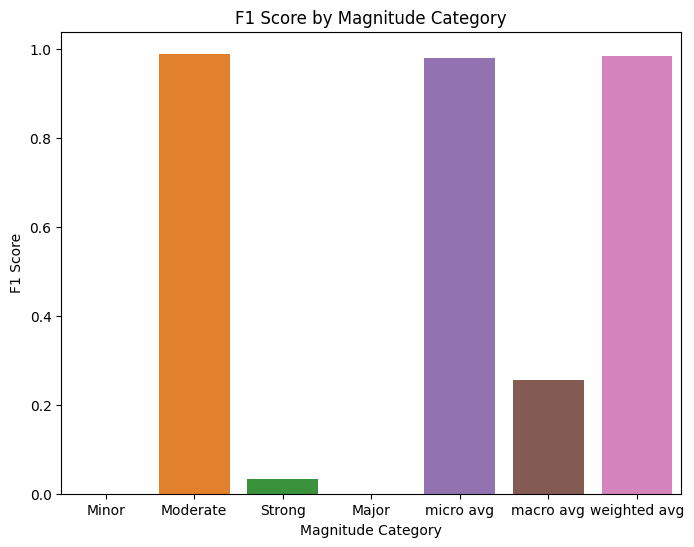

In [22]:
cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'], output_dict=True)
# Convert classification report dictionary to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Create bar plot of classification report scores
plt.figure(figsize=(8, 6))
sns.barplot(x=cr_df.index, y=cr_df['f1-score'])
plt.xlabel('Magnitude Category')
plt.ylabel('F1 Score')
plt.title('F1 Score by Magnitude Category')
plt.show()
print(" ")

##SVM

In [24]:
import io
myfile = io.BytesIO(uploaded['earthquake_dataset.csv'])
type(myfile)

import pandas as pd
df = pd.read_csv(myfile,delimiter=r'\s+')
type(df)

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude", "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

display(df)

,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude,Magnitude_Category,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,1967/08/22,08:29:47.47,36.40050,-120.98650,36.357,3.0,Mx,9,298,16.0,0.63,NCSN,1001120.0
1,1967/08/26,10:35:05.61,36.53867,-121.16033,4.277,3.3,Mx,13,80,2.0,0.05,NCSN,1001154.0
2,1967/08/27,13:20:08.75,36.51083,-121.14500,1.386,3.6,Mx,11,174,6.0,0.11,NCSN,1001166.0
3,1968/01/12,22:19:10.35,36.64533,-121.24966,6.578,3.0,ML,14,155,2.0,0.07,NCSN,1001353.0
4,1968/02/09,13:42:37.05,37.15267,-121.54483,8.256,3.0,ML,25,157,7.0,0.08,NCSN,1001402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1989/10/18,04:28:14.73,36.97967,-121.76200,15.105,3.5,ML,43,69,6.0,0.07,NCSN,10090454.0
9994,1989/10/18,04:50:26.81,37.17067,-122.01017,10.354,4.3,ML,46,59,2.0,0.06,NCSN,10090130.0
9995,1989/10/18,05:09:33.58,37.03700,-121.79450,10.477,3.0,ML,14,212,15.0,0.05,NCSN,10090450.0
9996,1989/10/18,05:18:34.06,37.02350,-121.84433,17.232,4.2,ML,34,212,10.0,0.08,NCSN,10090129.0


In [25]:
# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -4.013229930045239


In [27]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -4.01, MSE: 0.90


In [28]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [3.31066056 0.21813349]


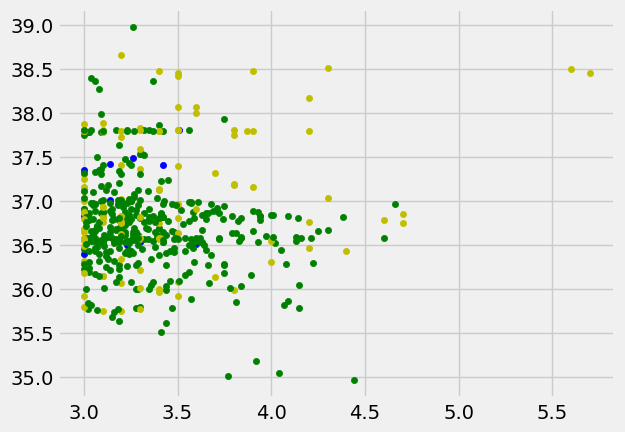

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_Category'][:subset_size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

In [30]:
print(df.columns)
df['Magnitude_Category'].unique()

Index(['Date(YYYY/MM/DD)', 'Time(UTC)', 'Latitude(deg)', 'Longitude(deg)',
       'Depth(km)', 'Magnitude', 'Magnitude_Category', 'No_of_Stations', 'Gap',
       'Close', 'RMS', 'SRC', 'EventID'],
      dtype='object')


array(['Mx', 'ML', 'Md', 'Mh'], dtype=object)

##Random Forest

In [32]:
import io
myfile = io.BytesIO(uploaded['earthquake_dataset.csv'])
type(myfile)

import pandas as pd
df = pd.read_csv(myfile,delimiter=r'\s+')
type(df)

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude", "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

display(df)

,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude,Magnitude_Category,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,1967/08/22,08:29:47.47,36.40050,-120.98650,36.357,3.0,Mx,9,298,16.0,0.63,NCSN,1001120.0
1,1967/08/26,10:35:05.61,36.53867,-121.16033,4.277,3.3,Mx,13,80,2.0,0.05,NCSN,1001154.0
2,1967/08/27,13:20:08.75,36.51083,-121.14500,1.386,3.6,Mx,11,174,6.0,0.11,NCSN,1001166.0
3,1968/01/12,22:19:10.35,36.64533,-121.24966,6.578,3.0,ML,14,155,2.0,0.07,NCSN,1001353.0
4,1968/02/09,13:42:37.05,37.15267,-121.54483,8.256,3.0,ML,25,157,7.0,0.08,NCSN,1001402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1989/10/18,04:28:14.73,36.97967,-121.76200,15.105,3.5,ML,43,69,6.0,0.07,NCSN,10090454.0
9994,1989/10/18,04:50:26.81,37.17067,-122.01017,10.354,4.3,ML,46,59,2.0,0.06,NCSN,10090130.0
9995,1989/10/18,05:09:33.58,37.03700,-121.79450,10.477,3.0,ML,14,212,15.0,0.05,NCSN,10090450.0
9996,1989/10/18,05:18:34.06,37.02350,-121.84433,17.232,4.2,ML,34,212,10.0,0.08,NCSN,10090129.0


In [33]:
df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude,Magnitude_Category,No_of_Stations,Gap,Close,RMS,SRC,EventID
1967-08-22 08:29:47.470,36.40050,-120.98650,36.357,3.0,Mx,9,298,16.0,0.63,NCSN,1001120.0
1967-08-26 10:35:05.610,36.53867,-121.16033,4.277,3.3,Mx,13,80,2.0,0.05,NCSN,1001154.0
1967-08-27 13:20:08.750,36.51083,-121.14500,1.386,3.6,Mx,11,174,6.0,0.11,NCSN,1001166.0
1968-01-12 22:19:10.350,36.64533,-121.24966,6.578,3.0,ML,14,155,2.0,0.07,NCSN,1001353.0
1968-02-09 13:42:37.050,37.15267,-121.54483,8.256,3.0,ML,25,157,7.0,0.08,NCSN,1001402.0
...,...,...,...,...,...,...,...,...,...,...,...
1989-10-18 04:28:14.730,36.97967,-121.76200,15.105,3.5,ML,43,69,6.0,0.07,NCSN,10090454.0
1989-10-18 04:50:26.810,37.17067,-122.01017,10.354,4.3,ML,46,59,2.0,0.06,NCSN,10090130.0
1989-10-18 05:09:33.580,37.03700,-121.79450,10.477,3.0,ML,14,212,15.0,0.05,NCSN,10090450.0
1989-10-18 05:18:34.060,37.02350,-121.84433,17.232,4.2,ML,34,212,10.0,0.08,NCSN,10090129.0


In [34]:
# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Mean Squared Error:  0.16593291014333336
R^2 Score:  0.07227704716411165


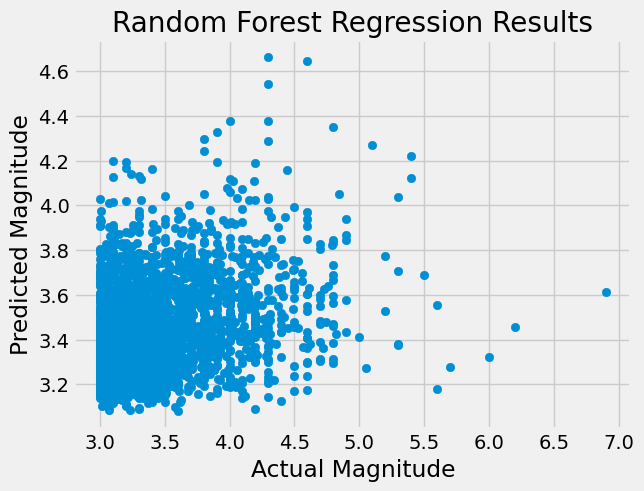

In [37]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

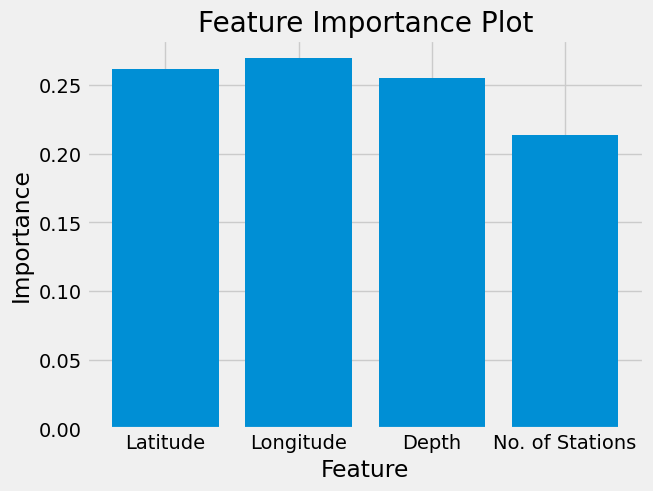

In [38]:
importances = rf.feature_importances_
features = ['Latitude', 'Longitude', 'Depth', 'No. of Stations']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

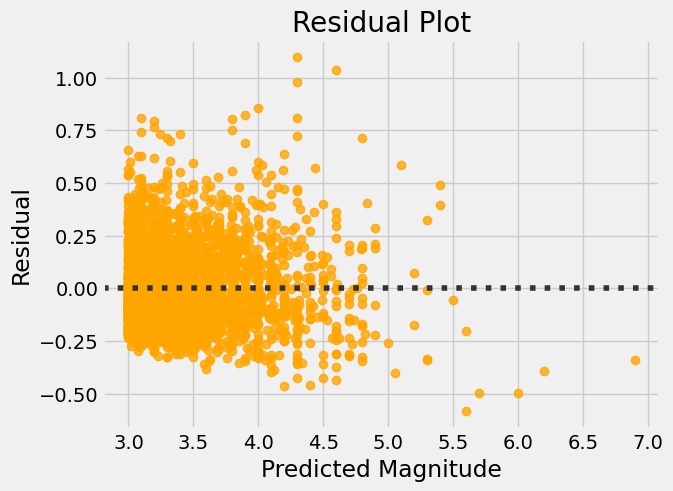

In [39]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

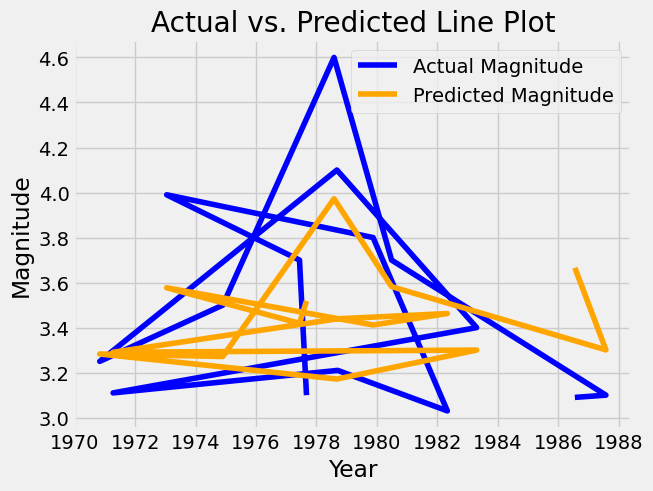

In [40]:
plt.plot(y_test.index[:15], y_test[:15], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:15], y_pred[:15], color='orange', label='Predicted Magnitude')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

##Conclusion

In [41]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.184512,0.014352
1,SVM,0.896668,-4.013230
2,Random Forest,0.165933,0.072277


In [42]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

,Model name,mse,R^2
2,Random Forest,0.165933,0.072277


In [43]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
2,Random Forest,0.165933,0.072277
